In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("gdl_synthetic_data.csv")

In [38]:
df.head()

,Porosity,Pore_Size_um,Fiber_Arrangement_Angle,Wettability_Contact_Angle,Performance_Score
0,0.524724,35.681266,9.281148,100.136104,43.474817
1,0.870429,13.365599,81.229762,106.715420,42.395306
2,0.739196,16.465149,45.472714,100.620629,67.944829
3,0.659195,45.942168,74.381172,95.322152,53.652467
4,0.393611,34.257162,28.804464,97.238152,49.217734


In [39]:
df

,Porosity,Pore_Size_um,Fiber_Arrangement_Angle,Wettability_Contact_Angle,Performance_Score
0,0.524724,35.681266,9.281148,100.136104,43.474817
1,0.870429,13.365599,81.229762,106.715420,42.395306
2,0.739196,16.465149,45.472714,100.620629,67.944829
3,0.659195,45.942168,74.381172,95.322152,53.652467
4,0.393611,34.257162,28.804464,97.238152,49.217734
...,...,...,...,...,...
195,0.509526,47.230293,42.656548,142.327435,55.746915
196,0.735573,44.336510,60.080196,145.927097,78.765262
197,0.838266,27.159761,15.508788,123.907991,70.947016
198,0.832252,40.034843,17.306012,131.799049,64.541734


In [40]:
df.isnull().sum()

Porosity                     0
Pore_Size_um                 0
Fiber_Arrangement_Angle      0
Wettability_Contact_Angle    0
Performance_Score            0
dtype: int64

In [41]:
df.shape

(200, 5)

In [42]:
df.describe()

,Porosity,Pore_Size_um,Fiber_Arrangement_Angle,Wettability_Contact_Angle,Performance_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.590404,30.175005,46.860551,118.726269,54.836933
std,0.176935,11.720048,27.657791,16.730075,14.834316
min,0.303313,10.202463,0.975389,91.086611,11.447063
25%,0.437149,20.458500,22.996828,104.158396,46.577778
50%,0.596692,31.665595,47.285953,118.027679,56.824340
75%,0.754116,39.687973,73.000340,133.464378,64.346481
max,0.892132,49.620206,89.974591,149.397614,88.381734


In [43]:
import pandas as pd

Q1 = df['Performance_Score'].quantile(0.25)
Q3 = df['Performance_Score'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Performance_Score'] < lower) | (df['Performance_Score'] > upper)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 4


In [44]:
df['Performance_Score'] = df['Performance_Score'].clip(lower, upper)

Text(0, 0.5, 'Values')

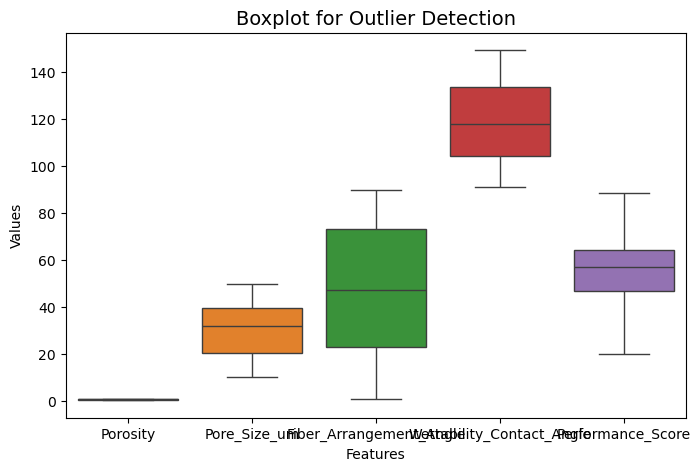

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
# Create the boxplot
sns.boxplot(data=df)
# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Values")
# Display the plot

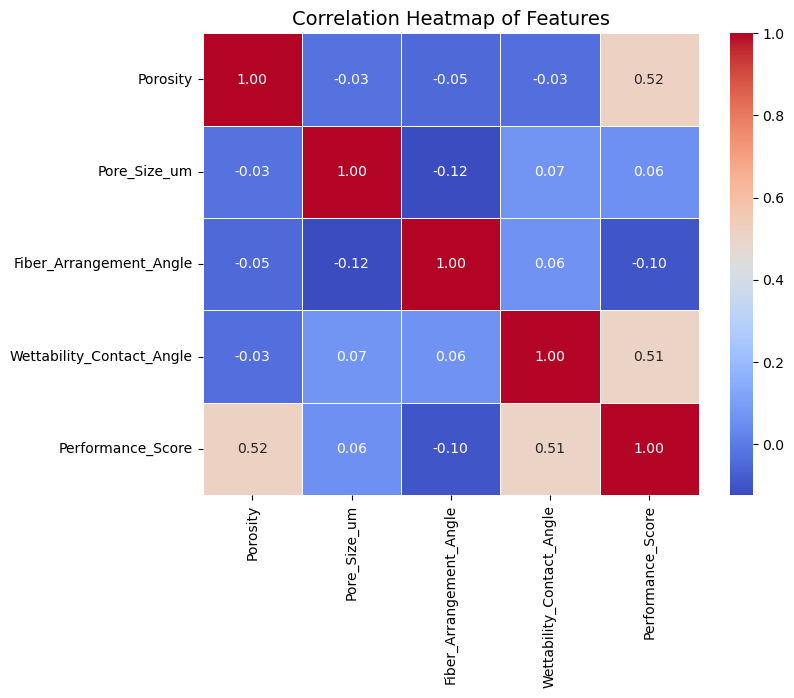

In [46]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.model_selection import train_test_split

# --- Step 1: Convert continuous target to categories ---
# Let's classify Performance_Score into 3 categories
bins = [0, 40, 70, 100]
labels = ['Low', 'Medium', 'High']
df['Performance_Category'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels)

# --- Step 2: Separate features and target ---
X = df[['Porosity', 'Pore_Size_um', 'Fiber_Arrangement_Angle', 'Wettability_Contact_Angle']]
y = df['Performance_Category']   # categorical target

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

✅ Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.33      0.50         9
         Low       1.00      0.50      0.67         6
      Medium       0.74      1.00      0.85        25

    accuracy                           0.78        40
   macro avg       0.91      0.61      0.67        40
weighted avg       0.83      0.78      0.74        40



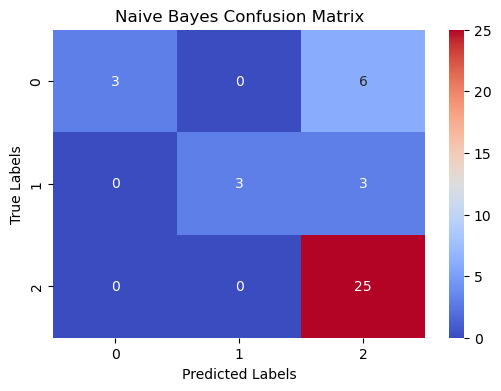

In [52]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()